In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
df = pd.read_csv("C:/Users/Vidhut Sharma/Downloads/ShortenedDelayFlight (1).csv")
df

,Unnamed: 0,ID,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,2008,1,3,4,1829,1755,1959,1925,...,3,10,0,N,0,2,0,0,0,32
1,1,1,2008,1,3,4,1937,1830,2037,1940,...,3,7,0,N,0,10,0,0,0,47
2,2,2,2008,1,3,4,1644,1510,1845,1725,...,6,8,0,N,0,8,0,0,0,72
3,3,3,2008,1,3,4,1452,1425,1640,1625,...,7,8,0,N,0,3,0,0,0,12
4,4,4,2008,1,3,4,1323,1255,1526,1510,...,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685729,685729,685729,2008,6,13,5,1609,1535,1942,1915,...,7,15,0,N,0,27,0,0,0,0
685730,685730,685730,2008,6,14,6,1616,1535,1954,1915,...,11,11,0,N,0,11,0,0,0,28
685731,685731,685731,2008,6,17,2,1617,1535,2002,1915,...,7,17,0,N,0,0,22,5,0,20
685732,685732,685732,2008,6,22,7,1607,1535,1941,1915,...,5,12,0,N,0,1,0,0,0,25


In [408]:
ListDest = {}
for name in df["Origin"].unique():
    Data = df[df["Origin"] == name]
    if any(Data["Dest"] == "0"):
        for i in Data["ID"]:
            if Data["Dest"][i] == "0":
                ListDest[i] = Data[Data["Distance"] == Data["Distance"][i]]["Dest"].unique()[0]

In [409]:
#Sorting Dict
myKeys = list(ListDest.keys())
myKeys.sort()
sorted_dict = {i: ListDest[i] for i in myKeys}
#sorted_dict

In [410]:
#Filling the missing destination in ListDataSort list 
df2 = df[df["Dest"] == "0"]
ListDataSort = []
for i in range(0,len(sorted_dict)):
    if list(sorted_dict.keys())[i] in df2["ID"]:
        ListDataSort.append(list(sorted_dict.values())[i])

In [412]:
#Filling the missing Destination values in df2
df2["Dest"] = ListDataSort
df2[["ID","Origin","Dest","Distance"]]

C:\Users\VIDHUT~1\AppData\Local\Temp/ipykernel_13260/3996090740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Dest"] = ListDataSort


,ID,Origin,Dest,Distance
15050,15050,TPA,RDU,587
30100,30100,MSY,LGA,1183
45150,45150,SLC,DEN,391
60200,60200,MDW,SFO,1855
75250,75250,SFO,SNA,372
90300,90300,DCA,MEM,762
105350,105350,MIA,ORD,1197
120400,120400,FLL,JFK,1069
135450,135450,PDX,RNO,444
150500,150500,IAD,SAV,515


In [415]:
#Filling the Destination column in the main dataframe
for i in df2["ID"]:
    df.loc[i] = df2.loc[i]

In [6]:
df = pd.read_csv("Cleaned Data.csv")
df

,ID,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,24156,2008,1,1,2,2337,2244,2347,2300,YV,...,7,8,0,N,0,47,0,0,0,0
1,24157,2008,1,1,2,1844,1745,1944,1853,YV,...,9,19,0,N,0,51,0,0,0,0
2,24372,2008,1,2,3,1244,1234,1345,1326,YV,...,15,15,0,N,0,19,0,0,0,0
3,24494,2008,1,3,4,1250,1234,1345,1326,YV,...,9,13,0,N,0,0,0,19,0,0
4,24582,2008,1,4,5,1320,1121,1405,1215,YV,...,4,14,0,N,0,110,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685729,673733,2008,6,5,4,1235,1215,1418,1401,9E,...,9,13,0,N,0,0,0,0,0,17
685730,673734,2008,6,8,7,1358,1215,1545,1401,9E,...,12,23,0,N,0,0,0,1,0,103
685731,673735,2008,6,13,5,1306,1215,1442,1401,9E,...,10,11,0,N,0,0,0,0,0,41
685732,673736,2008,6,19,4,1252,1215,1423,1401,9E,...,6,5,0,N,0,22,0,0,0,0


In [8]:
len(df)

685734

In [27]:
Origin_Dist = df[["Origin","Dest","Distance"]]
Origin_Dist

,Origin,Dest,Distance
0,YUM,LAS,4962
1,YUM,PHX,4962
2,YUM,PHX,4962
3,YUM,PHX,4962
4,YUM,PHX,4962
...,...,...,...
685729,ABE,DTW,31
685730,ABE,DTW,30
685731,ABE,DTW,24
685732,ABE,DTW,24


In [18]:
Origin_Dest = {"s":1, "g":2}
"s" not in list(Origin_Dest.keys())

False

In [30]:
Origin_Dest[Origin_Dist["Origin"][0] +"_" + Origin_Dist["Dest"][0]] = Origin_Dist["Distance"][i]
Origin_Dest

{'YUM_LAS': 4962}

In [33]:
Origin_Dest = {}

for i in range(0,len(df)):
    KeyName = df["Origin"][i] +"_" + df["Dest"][i]
    if KeyName not in Origin_Dest.keys() and df["Distance"][i] not in Origin_Dest.values():
        Origin_Dest[KeyName] = df["Distance"][i]
#Origin_Dest

{'YUM_LAS': 4962,
 'YUM_PHX': 4502,
 'YUM_LAX': 4243,
 'YAK_CDV': 4213,
 'YAK_JNU': 4184,
 'XNA_IAH': 3972,
 'XNA_ORD': 3904,
 'XNA_LGA': 3784,
 'XNA_DEN': 3711,
 'XNA_DFW': 3417,
 'XNA_MIA': 3365,
 'XNA_ATL': 3329,
 'XNA_DTW': 3303,
 'XNA_EWR': 3266,
 'XNA_LAX': 2994,
 'XNA_RDU': 2936,
 'XNA_MEM': 2917,
 'XNA_DCA': 2846,
 'XNA_CVG': 2845,
 'XNA_MSP': 2762,
 'WYS_SLC': 2704,
 'VPS_ATL': 2701,
 'VPS_DFW': 2693,
 'VPS_ORD': 2689,
 'VPS_IAH': 2688,
 'VPS_MEM': 2677,
 'VLD_ATL': 2640,
 'TYS_IAH': 2615,
 'TYS_ORD': 2614,
 'TYS_DTW': 2611,
 'TYS_ATL': 2603,
 'TYS_DFW': 2602,
 'TYS_EWR': 2588,
 'TYS_MCO': 2586,
 'TUS_LAS': 2585,
 'TUS_DFW': 2583,
 'TUS_ORD': 2576,
 'TUS_LAX': 2575,
 'TUS_SAN': 2569,
 'TUS_ABQ': 2565,
 'TUS_OMA': 2562,
 'TUS_PHX': 2556,
 'TUL_MEM': 2553,
 'TUL_MCI': 2551,
 'TUL_PHX': 2548,
 'TUL_EWR': 2541,
 'TUL_SLC': 2537,
 'TUL_ATL': 2534,
 'TUL_ORD': 2530,
 'TUL_DTW': 2527,
 'TUL_DFW': 2521,
 'TUL_DAL': 2518,
 'TUL_MSP': 2504,
 'TUL_SAN': 2496,
 'TUL_IAH': 2486,
 'TUL_ONT'

In [67]:
Origin_DestNames = list(Origin_Dest.keys())[0:10]
Origin_DestValues = list(Origin_Dest.values())[0:10]
Origin_DestValues

[4962, 4502, 4243, 4213, 4184, 3972, 3904, 3784, 3711, 3417]

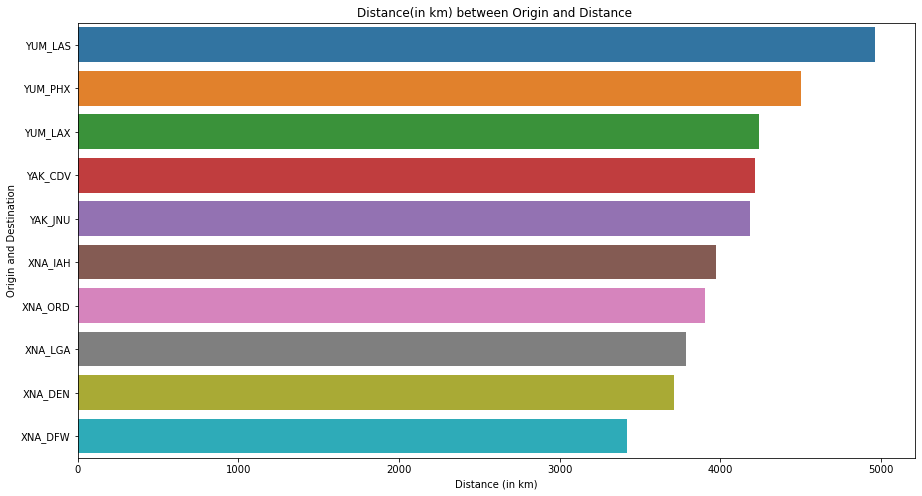

In [144]:
plt.subplots(figsize = (15,8))
sns.barplot(x = Origin_DestValues,y = Origin_DestNames)
plt.ylabel("Origin and Destination")
plt.xlabel("Distance (in km)")
plt.title("Distance(in km) between Origin and Distance ")
plt.show();

In [71]:
Origin_DestNames_LeastDistance = list(Origin_Dest.keys())[-11:-1]
Origin_DestValues_LeastDistance = list(Origin_Dest.values())[-11:-1]
Origin_DestValues_LeastDistance


[70, 68, 67, 64, 58, 56, 55, 49, 47, 41]

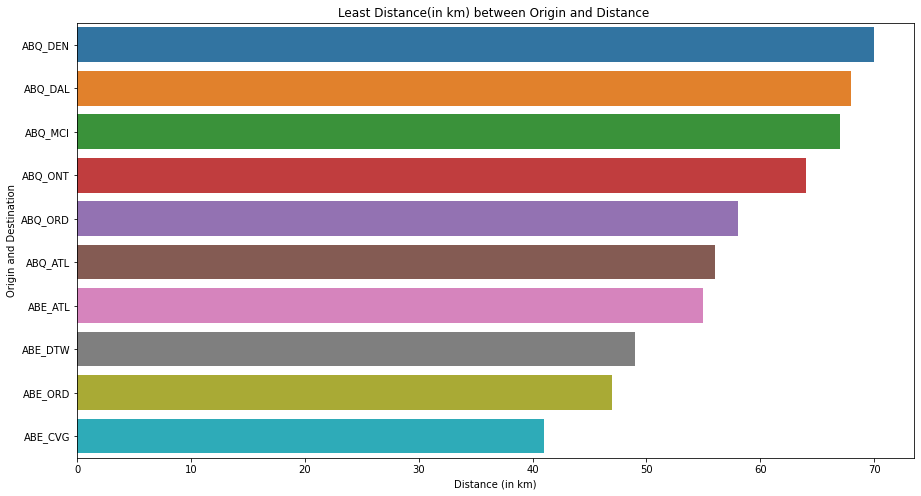

In [145]:
plt.subplots(figsize = (15,8))
sns.barplot(x = Origin_DestValues_LeastDistance,y = Origin_DestNames_LeastDistance)
plt.ylabel("Origin and Destination")
plt.xlabel("Distance (in km)")
plt.title("Least Distance(in km) between Origin and Distance ")
plt.show();

In [103]:
MostVisitedDest = {}
count = 0

for i in range(0,len(df)):
    if df["Dest"][i] not in MostVisitedDest.keys():
        MostVisitedDest[df["Dest"][i]] = 1
    else:
        MostVisitedDest[df["Dest"][i]] = MostVisitedDest[df["Dest"][i]]+1
        
MostVisitedDest

{'LAS': 16661,
 'PHX': 15273,
 'SLC': 9698,
 'LAX': 20923,
 'IPL': 78,
 'JNU': 288,
 'CDV': 72,
 'EWR': 20561,
 'IAH': 14037,
 'ORD': 47120,
 'ATL': 33601,
 'DEN': 21337,
 'LEX': 1094,
 'DFW': 25947,
 'MIA': 7022,
 'RDU': 6069,
 'DCA': 6714,
 'LGA': 16037,
 'MEM': 6780,
 'DTW': 14369,
 'MSP': 11098,
 'SGF': 1259,
 'CVG': 7664,
 'PSG': 63,
 'KTN': 199,
 'CLE': 6511,
 'AUS': 5237,
 'MCO': 11977,
 'MSN': 1663,
 'ABQ': 3855,
 'MDW': 8031,
 'SAN': 9024,
 'OAK': 6207,
 'ONT': 3610,
 'ELP': 2102,
 'MCI': 6767,
 'RNO': 2727,
 'SMF': 5439,
 'SAT': 5049,
 'OMA': 3281,
 'GEG': 1600,
 'SFO': 17162,
 'SEA': 9124,
 'JFK': 10757,
 'IAD': 8117,
 'CLT': 9434,
 'DAL': 5552,
 'HOU': 6082,
 'STL': 6091,
 'ASE': 633,
 'ALB': 1468,
 'BDL': 3132,
 'BHM': 2400,
 'BUF': 2729,
 'BWI': 9333,
 'CMH': 4011,
 'FLL': 6888,
 'ISP': 1012,
 'JAX': 3424,
 'MHT': 2059,
 'PBI': 2717,
 'PHL': 10275,
 'PIT': 4356,
 'PVD': 2351,
 'SDF': 2659,
 'BNA': 6184,
 'MSY': 3947,
 'IND': 4501,
 'ORF': 1971,
 'DAY': 1694,
 'MKE': 4357,

In [140]:
ListData = list(MostVisitedDest.values())
ListData_Keys = list(MostVisitedDest.keys())
ListData.sort(reverse = True)
ListData_Sorted = ListData[0:5]


'ORD'

In [141]:
CreatingFinalListOfPlaces = []

for i in range(0,len(ListData_Sorted)):
    CreatingFinalListOfPlaces.append(ListData_Keys[list(MostVisitedDest.values()).index(ListData_Sorted[i])])
CreatingFinalListOfPlaces

['ORD', 'ATL', 'DFW', 'DEN', 'LAX']

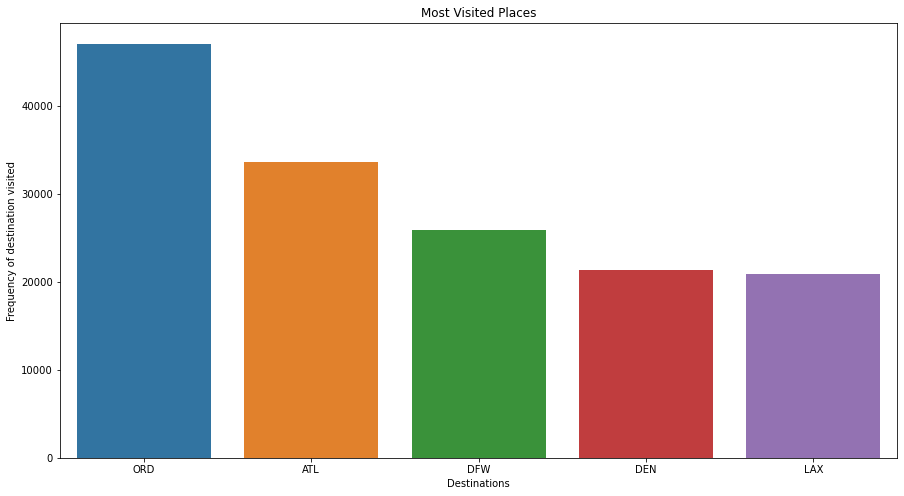

In [146]:
#Final Lists of top 5 places visited

plt.subplots(figsize = (15,8))
sns.barplot(x = CreatingFinalListOfPlaces,y = ListData_Sorted)
plt.ylabel("Frequency of destination visited")
plt.xlabel("Destinations")
plt.title("Most Visited Places")
plt.show();